In [1]:
!pip install geopandas
!pip install shapely
!pip install plotly_express
!pip install networkx
!pip install osmnx
!pip install matplotlib==3.1.3
!pip install haversine

     |████████████████████████████████| 1.0MB 7.5MB/s 
     |████████████████████████████████| 15.4MB 245kB/s 
     |████████████████████████████████| 6.6MB 23.1MB/s 
     |████████████████████████████████| 102kB 6.0MB/s 
     |████████████████████████████████| 10.3MB 11.4MB/s 
     |████████████████████████████████| 1.0MB 51.3MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


     |████████████████████████████████| 13.1MB 334kB/s 
ERROR: osmnx 1.1.1 has requirement matplotlib>=3.3, but you'll have matplotlib 3.1.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2


In [33]:
#SNU map

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import plotly_express as px
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

ox.config(use_cache=True, log_console=True)
SNU = ox.graph_from_point((37.4587,126.9523), dist = 1300, network_type= "walk", simplify=True) 

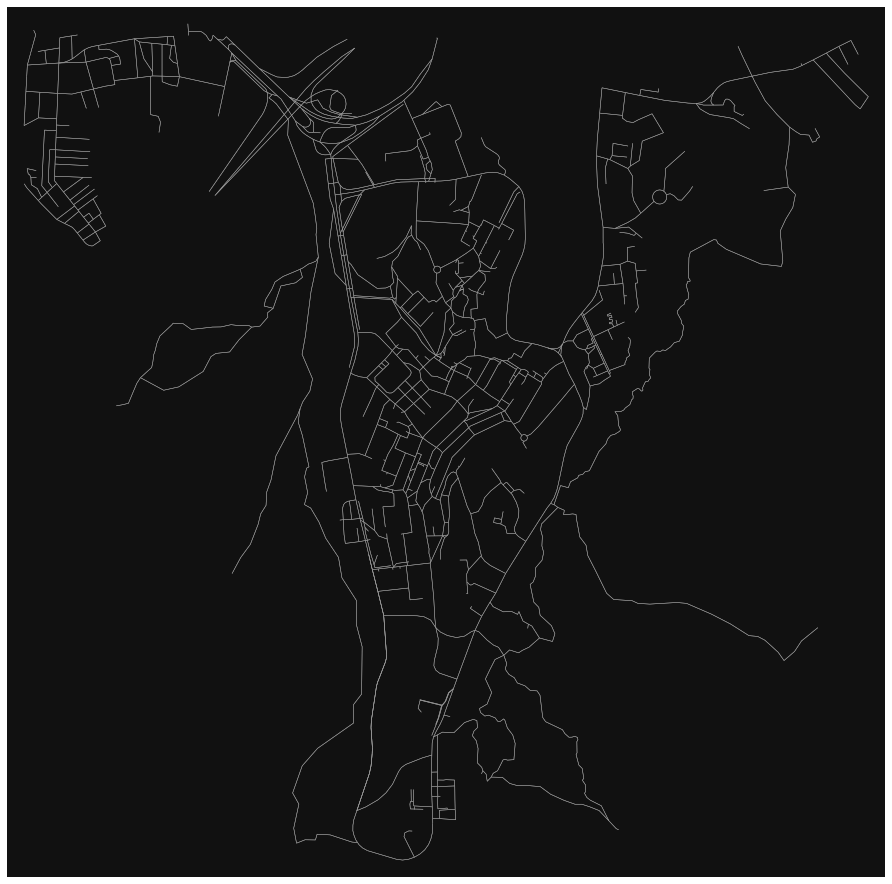

In [27]:
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5,figsize=(16, 16))

## shortest path 
### plotting

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning:

The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning:

The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.



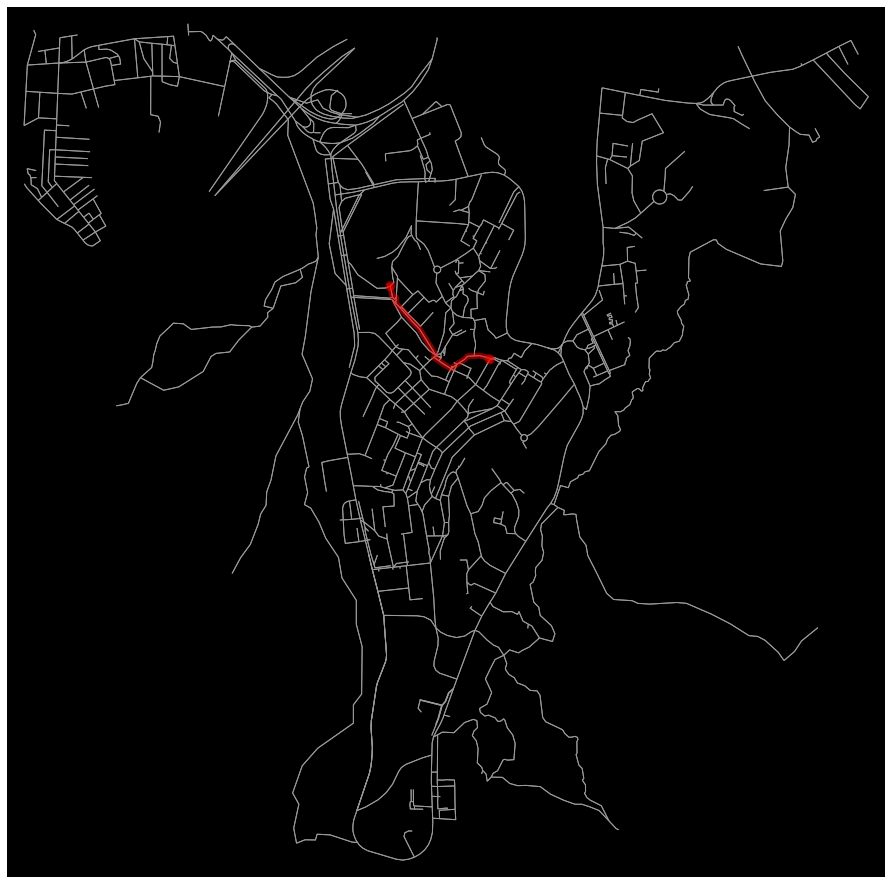

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1adf00b710>)

In [95]:
## 경영대 -> 14동
G = ox.add_edge_speeds(G) #Impute
G = ox.add_edge_travel_times(G) #Travel time
start = (37.46328,126.95005)
end = (37.46065,126.95400)
start_node = ox.get_nearest_node(G, start)
end_node = ox.get_nearest_node(G, end)
# Calculate the shortest path
route = nx.shortest_path(G, start_node, end_node, weight='length',method='dijkstra')
#Plot the route and street networks
ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k',figsize=(16, 16) )

### shortest path - length

In [96]:
nx.shortest_path_length(G, start_node, end_node, weight='length')

486.624

### let average walk speed - 5km/h

In [97]:
nx.shortest_path_length(G, start_node, end_node, weight='length')/1000*12

5.839488

### building # : (latitude, longitude) dic

In [ ]:
## 553 - 7분
## 거리: 688m. 시간: 0:08.
## 거리: 887m. 시간: 0:11.
## 거리: 744m. 시간: 0:10.
## 2.0km. 시간: 0:25.
## 거리: 1.2km. 시간: 0:15.

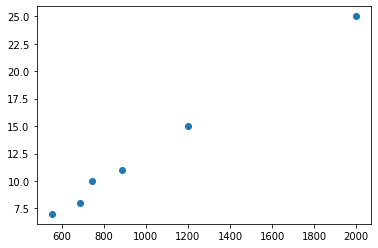

In [89]:
plt.scatter([553,688,887,744,2000,1200],[7,8,11,10,25,15])

In [39]:
SNU.nodes[1793042689]

{'street_count': 1, 'x': 126.9518719, 'y': 37.4596349}

In [36]:
start_node

1793042689

In [45]:
SNU.edges(1793042689)

OutMultiEdgeDataView([(1793042689, 1793038582)])

In [47]:
SNU.edges[(1793042689,1793038582,0)]

{'geometry': <shapely.geometry.linestring.LineString at 0x7f1af1ac0650>,
 'highway': ['pedestrian', 'steps'],
 'length': 45.608,
 'oneway': False,
 'osmid': [847953676, 167985254]}

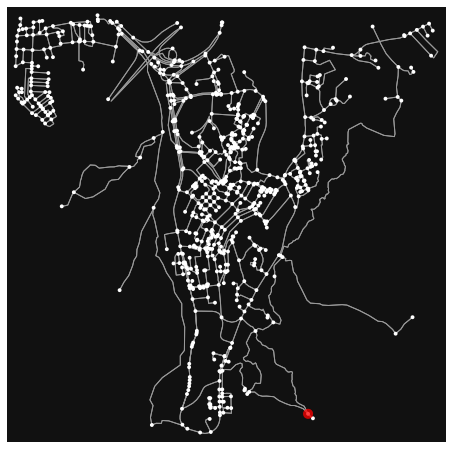

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1ae6415390>)

In [83]:
ox.plot_graph_route(G, [442812632])

In [51]:
SNU.edges

OutMultiEdgeView([(442812632, 442812648, 0), (442812632, 442817525, 0), (442812632, 6086595263, 0), (442812648, 442812650, 0), (442812648, 442812632, 0), (442812648, 6086595263, 0), (442812650, 442812648, 0), (442812650, 3621167393, 0), (442817525, 442812632, 0), (445310303, 4532193682, 0), (445310303, 1372131611, 0), (445310303, 3893418112, 0), (445310303, 1372131622, 0), (445310304, 4135043947, 0), (445310304, 4135043947, 1), (445310304, 4531601920, 0), (445310304, 1843397253, 0), (445310304, 1843397253, 1), (445310310, 1789877101, 0), (445310310, 1789877079, 0), (445310310, 445310320, 0), (445310310, 1789877113, 0), (445310320, 1790388378, 0), (445310320, 445310310, 0), (445310320, 2044015704, 0), (445310320, 2548591996, 0), (445310320, 1789861909, 0), (1083241310, 3540602546, 0), (1083241310, 1083241312, 0), (1083241310, 1083241315, 0), (1083241312, 8552364824, 0), (1083241312, 8552364825, 0), (1083241312, 1083241310, 0), (1083241312, 4532193684, 0), (1083241315, 3927939010, 0), (1

In [53]:
G.edges[(442812632, 442812648, 0)]

{'geometry': <shapely.geometry.linestring.LineString at 0x7f1af0618b50>,
 'highway': 'path',
 'length': 404.276,
 'oneway': False,
 'osmid': 356701922,
 'speed_kph': 55.0,
 'travel_time': 26.5}

In [ ]:
nx.draw(G,node)

In [60]:
type(G.edges[(442812632, 442812648, 0)]["geometry"])

shapely.geometry.linestring.LineString

In [72]:
zip(G.edges[(442812632, 442812648, 0)]["geometry"].xy[0],G.edges[(442812632, 442812648, 0)]["geometry"].xy[1])

In [73]:

for u, v, data in G.edges(keys=False, data=True):
    simp = '' if 'geometry' in data else 'not '
    print(f'edge {data["osmid"]} has {simp}been simplified')

edge 356701922 has been simplified
edge 356701922 has been simplified
edge 648281979 has been simplified
edge 356701922 has not been simplified
edge 356701922 has been simplified
edge 648281976 has been simplified
edge 356701922 has not been simplified
edge 356701920 has been simplified
edge 356701922 has been simplified
edge 37929022 has not been simplified
edge 456934305 has not been simplified
edge 457001563 has been simplified
edge [457001562, 457001563] has been simplified
edge 456934306 has not been simplified
edge 923308480 has not been simplified
edge 456934312 has not been simplified
edge 457001548 has not been simplified
edge 923308480 has not been simplified
edge 167597852 has not been simplified
edge 37929023 has been simplified
edge 37929026 has been simplified
edge 167597860 has been simplified
edge 167658421 has not been simplified
edge 37929026 has been simplified
edge [37929026, 847953677] has been simplified
edge 161950113 has been simplified
edge [167597856, 16798283

In [74]:
simp

''

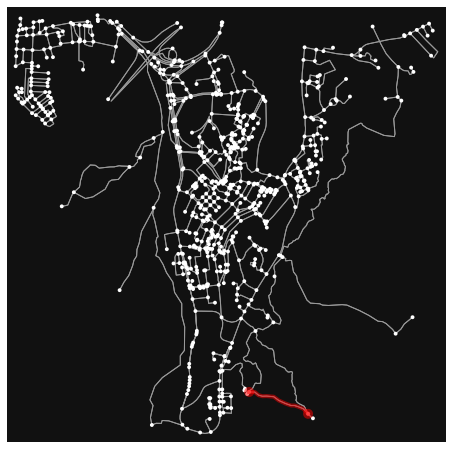

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1ae62c6ed0>)

In [75]:
ox.plot_graph_route(G, [442812632, 442812648])

In [ ]:
## edge 길이 바꿔주기